In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/run-over-dataset.csv")
df.head()

,VERBALE,DATA,SESSO,ANNI,PESO,ALTEZZA,BMI,Mezzo,Testa:Neurocranio,Testa:Splancnocranio,...,II raggio sx.1,III raggio sx.1,IV raggio sx.1,V raggio sx.1,Art. coxo-femorale dx,Art. coxo-femorale sx,Rotula o Ginocchio dx,Rotula o Ginocchio sx,Caviglia dx,Caviglia sx
0,85567,10/29/1999,0,81,84,"1,75","27,4285714285714",0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,85829,1/14/2000,1,69,69,"1,62","26,291723822588",1,4,4,...,0,0,0,0,0,0,0,0,0,0
2,85977,3/10/2000,1,71,67,"1,55","27,8876170655567",1,2,0,...,0,0,0,0,0,0,0,0,0,0
3,86220,6/14/2000,1,54,60,"1,59","23,7332384003797",1,4,0,...,0,0,0,0,0,0,0,0,0,0
4,86247,6/22/2000,1,78,69,"1,67","24,7409372871024",1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
num_null_els = 0
for column in df.columns:
    num_null_els += sum(df[column].isnull().any() for column in df.columns)
    
print(num_null_els)

0


In [4]:
cols_to_drop = ['Mezzo', 'VERBALE', 'DATA', 'BMI']
X, y =df.drop(columns=cols_to_drop), df['Mezzo']
X.shape, y.shape

((130, 363), (130,))

In [5]:
X['ALTEZZA'] = [int(float(h.replace(',', '.'))*100) for h in X['ALTEZZA']]
X['PESO'] = [int(float(str(h).replace(',', '.'))) for h in X['ALTEZZA']]

In [6]:
X.head()

,SESSO,ANNI,PESO,ALTEZZA,Testa:Neurocranio,Testa:Splancnocranio,Testa:Telencefalo,Testa:Cervelletto,Testa:Tronco encefalico,Torace:Polmoni,...,II raggio sx.1,III raggio sx.1,IV raggio sx.1,V raggio sx.1,Art. coxo-femorale dx,Art. coxo-femorale sx,Rotula o Ginocchio dx,Rotula o Ginocchio sx,Caviglia dx,Caviglia sx
0,0,81,175,175,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,69,162,162,4,4,4,4,4,3,...,0,0,0,0,0,0,0,0,0,0
2,1,71,155,155,2,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
3,1,54,159,159,4,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4,1,78,167,167,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X.dtypes

SESSO                    int64
ANNI                     int64
PESO                     int64
ALTEZZA                  int64
Testa:Neurocranio        int64
                         ...  
Art. coxo-femorale sx    int64
Rotula o Ginocchio dx    int64
Rotula o Ginocchio sx    int64
Caviglia dx              int64
Caviglia sx              int64
Length: 363, dtype: object

<AxesSubplot:ylabel='Frequency'>

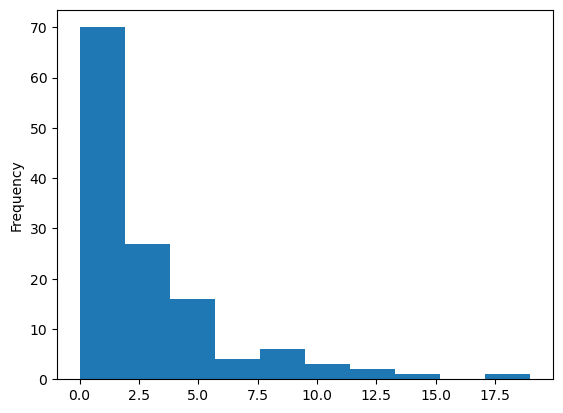

In [14]:
X['Tot Addome'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

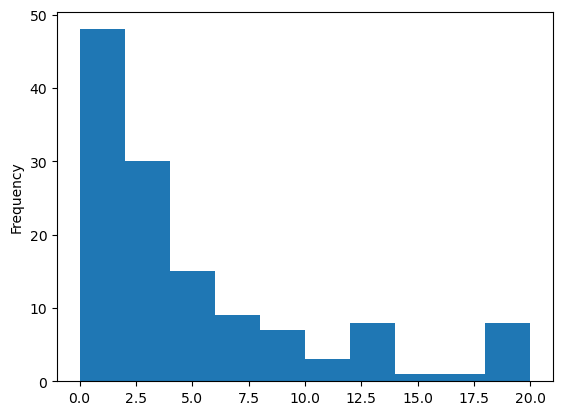

In [17]:
X['Tot Testa'].plot.hist()

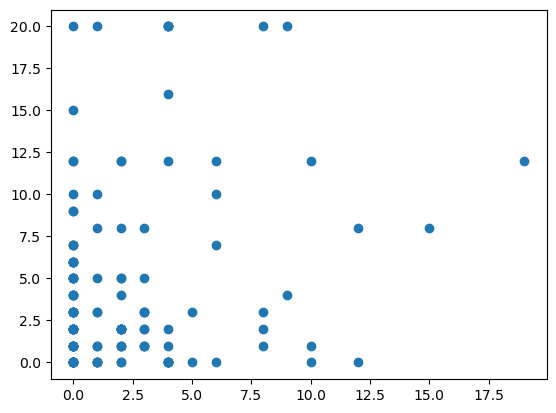

In [18]:
import matplotlib.pyplot as plt 

plt.scatter(X['Tot Addome'], X['Tot Testa'])

In [31]:
columns_to_mantain = ['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'Tot Testa', 'Tot Torace', 'Tot Addome',
                       'Tot Scheletro', 'Tot Volta Cranica', 'Tot Base Cranica', 'Tot Neuroc.', 
                       'Tot Splancnoc.', 'Tot Tratto cervicale', 'Tot Tratto toracico', 'Tot Tratto lombare', 
                       'Tot Rachide', 'Totale coste', 'Tot Bacino']
columns_to_mantain

['SESSO',
 'ANNI',
 'PESO',
 'ALTEZZA',
 'Tot Testa',
 'Tot Torace',
 'Tot Addome',
 'Tot Scheletro',
 'Tot Volta Cranica',
 'Tot Base Cranica',
 'Tot Neuroc.',
 'Tot Splancnoc.',
 'Tot Tratto cervicale',
 'Tot Tratto toracico',
 'Tot Tratto lombare',
 'Tot Rachide',
 'Totale coste',
 'Tot Bacino']

Queste sono alcune colonne che fanno riferimento alla somma dei valori in colonne precedenti.

In [44]:
def low_std_cols(X, beta):
    columns_low_std = []
    for column in X.columns:
        if X[column].std() <= beta:
            columns_low_std.append(column)

    return columns_low_std, len(columns_low_std)

low_std_cols(X, 0)

(['L4',
  'L5',
  'I metacarpo dx',
  'II metacarpo dx',
  'III metacarpo dx',
  'I raggio dx',
  'II raggio dx',
  'IV raggio dx',
  'V raggio dx',
  'I metacarpo sx',
  'II metacarpo sx',
  'III metacarpo sx',
  'IV metacarpo sx',
  'I raggio sx',
  'II raggio sx',
  'IV raggio sx',
  'Polso dx',
  'tarso dx',
  'I metatarso dx',
  'II metatarso dx',
  'III metatarso dx',
  'IV metatarso dx',
  'V metatarso dx',
  'I raggio dx.1',
  'II raggio dx.1',
  'III raggio dx.1',
  'IV raggio dx.1',
  'V raggio dx.1',
  'I metatarso sx',
  'II metatarso sx',
  'III metatarso sx',
  'IV metatarso sx',
  'V metatarso sx',
  'I raggio sx.1',
  'II raggio sx.1',
  'III raggio sx.1',
  'IV raggio sx.1',
  'V raggio sx.1',
  'Art. coxo-femorale sx',
  'Caviglia sx'],
 40)

In [49]:
def zero_columns(X):
    zero_cols = []
    cols, n = low_std_cols(X, 0)

    for col in cols:
        if sum(X[col]) == 0:
            zero_cols.append(col)
    
    return zero_cols, (len(zero_cols) == n)

zero_columns(X)

(['L4',
  'L5',
  'I metacarpo dx',
  'II metacarpo dx',
  'III metacarpo dx',
  'I raggio dx',
  'II raggio dx',
  'IV raggio dx',
  'V raggio dx',
  'I metacarpo sx',
  'II metacarpo sx',
  'III metacarpo sx',
  'IV metacarpo sx',
  'I raggio sx',
  'II raggio sx',
  'IV raggio sx',
  'Polso dx',
  'tarso dx',
  'I metatarso dx',
  'II metatarso dx',
  'III metatarso dx',
  'IV metatarso dx',
  'V metatarso dx',
  'I raggio dx.1',
  'II raggio dx.1',
  'III raggio dx.1',
  'IV raggio dx.1',
  'V raggio dx.1',
  'I metatarso sx',
  'II metatarso sx',
  'III metatarso sx',
  'IV metatarso sx',
  'V metatarso sx',
  'I raggio sx.1',
  'II raggio sx.1',
  'III raggio sx.1',
  'IV raggio sx.1',
  'V raggio sx.1',
  'Art. coxo-femorale sx',
  'Caviglia sx'],
 True)

Queste colonne nel dataset hanno tutti i valori a 0: si possono eliminare.